# Uma Abordagem Científica (e didática) para Automatizar o "Match"  dos Curricula-Vitae de Candidatos Potenciais a Vagas com Perfis Prédefinidos

### Um caso de uso das bibliotecas python NLTK, pdfplumb e wordcloud, resolvendo o "match" dos curricula de candidados a vagas em times de Casas de Análise e Asset Allocation (versão em pt-br)

In [63]:
# Tested environment - Ms Windows 10
# Install Anaconda Python (search Google to download and install)
# Create Anaconda virtual (nlp) environment (ex.: conda create nlp)
# and install basic libraries

# !pip install pdfplumber
# !pip install nltk
# !pip install wordcloud
# !pip install pandas

In [64]:
# Import libraries
import pdfplumber
import nltk

In [65]:
# Permite a execução de gráficos d forma anexada ao Jupyter Notebook
%matplotlib inline

In [66]:
# Lendo um curriculum com pdfplumb
file_name = 'ARMB1.pdf'
pdfFile = pdfplumber.open(file_name)

In [67]:
# Lendo apenas a 1a. página
first_page = pdfFile.pages[0]

In [68]:
# Extraindo o texto bruto
rawText = first_page.extract_text()

### [ 1 ] Primeira Olhada

In [69]:
print(rawText)

ANTONIO ROBERTO MENDES BARBERÁ 
 
Av. Ataulfo de Paiva, 7000/101 • LEBLON • 22440-033 • RIO DE JANEIRO, RJ • BRASIL 
Fixo: (21) 2297-2045 • móvel: (21) 9 9999-9999 • e-mail armb@globo.com 
 
Cientista de Dados (& pesquisador) no Mercado Financeiro 
Profissional de Tecnologia da Informação 
 
PALAVRAS-CHAVE (KEY WORDS) 
 
Ciência / dados / data / redes / neurais / neural / ativos / assets / aprendizado / learning / máquinas / machine / finanças / ux / 
cliente / client /  full / stack / desenvolvimento / development / data / science / network / machine learning / compartilhamento / 
sharing / knowledge / AI / inteligência / artificial / intelligence / fintechs / green / voluntário / voluntariado / volunteer Google / 
Colab / Python / GitHub/ Kaggle / JavaScript / jQuery / Bootstrap / SQL / server / side / network / software / engineer / architect / 
research / pesquisa / AWS / Stanford University / PUC / RJ / BR / Brasil /ação/ ações / adr / algoritmo / apresentação / arrojado / 
banco 

### [ 2 ] Olhando os Metadados do arquivo lido

In [70]:
# cv METADATA - Checando os metadados do arquivo de curriculum em formato pdf (é um python dict) 
pdfFile.metadata

{'Author': 'R B',
 'Creator': 'Microsoft® Word para Microsoft 365',
 'CreationDate': "D:20210702195937-03'00'",
 'ModDate': "D:20210702195937-03'00'",
 'Producer': 'Microsoft® Word para Microsoft 365'}

### [ 3 ] Procurando Hiperlinks

In [71]:
# cv HYPERLINKS - Verificando se o arquivo faz referência a links e a quais links
pdfFile.hyperlinks # retorna um python dict

[{'page_number': 1,
  'object_type': 'annot',
  'x0': Decimal('258.010'),
  'y0': Decimal('450.520'),
  'x1': Decimal('420.430'),
  'y1': Decimal('462.730'),
  'doctop': Decimal('379.190'),
  'top': Decimal('379.190'),
  'bottom': Decimal('391.400'),
  'width': Decimal('162.420'),
  'height': Decimal('12.210'),
  'uri': 'https://rbarbera2.wixsite.com/backlog',
  'title': None,
  'contents': None,
  'data': {'Subtype': /'Link',
   'Rect': [258.01, 450.52, 420.43, 462.73],
   'BS': {'W': 0},
   'F': 4,
   'A': {'Type': /'Action',
    'S': /'URI',
    'URI': b'https://rbarbera2.wixsite.com/backlog'},
   'StructParent': 1}},
 {'page_number': 1,
  'object_type': 'annot',
  'x0': Decimal('381.020'),
  'y0': Decimal('365.070'),
  'x1': Decimal('477.220'),
  'y1': Decimal('377.280'),
  'doctop': Decimal('464.640'),
  'top': Decimal('464.640'),
  'bottom': Decimal('476.850'),
  'width': Decimal('96.200'),
  'height': Decimal('12.210'),
  'uri': 'http://www.puc-rio.br/',
  'title': None,
  'cont

### [ 4 ]  Analisando as pontuações e demais Stop Words

In [72]:
# Visualizando o texto bruto para avaliar que tipo de limpeza será necessária (ex.: eliminação de símbolos, preposições, conjunções, 
# pontuações, barras, etc.)

print(rawText)

ANTONIO ROBERTO MENDES BARBERÁ 
 
Av. Ataulfo de Paiva, 7000/101 • LEBLON • 22440-033 • RIO DE JANEIRO, RJ • BRASIL 
Fixo: (21) 2297-2045 • móvel: (21) 9 9999-9999 • e-mail armb@globo.com 
 
Cientista de Dados (& pesquisador) no Mercado Financeiro 
Profissional de Tecnologia da Informação 
 
PALAVRAS-CHAVE (KEY WORDS) 
 
Ciência / dados / data / redes / neurais / neural / ativos / assets / aprendizado / learning / máquinas / machine / finanças / ux / 
cliente / client /  full / stack / desenvolvimento / development / data / science / network / machine learning / compartilhamento / 
sharing / knowledge / AI / inteligência / artificial / intelligence / fintechs / green / voluntário / voluntariado / volunteer Google / 
Colab / Python / GitHub/ Kaggle / JavaScript / jQuery / Bootstrap / SQL / server / side / network / software / engineer / architect / 
research / pesquisa / AWS / Stanford University / PUC / RJ / BR / Brasil /ação/ ações / adr / algoritmo / apresentação / arrojado / 
banco 

### [ 5 ]  Preprocessamento e posterior limpeza do texto bruto

In [73]:
# Primeira "tokenização" om punkt
nltk.download('punkt')
word_list = nltk.tokenize.word_tokenize(rawText)
print(word_list)

['ANTONIO', 'ROBERTO', 'MENDES', 'BARBERÁ', 'Av', '.', 'Ataulfo', 'de', 'Paiva', ',', '7000/101', '•', 'LEBLON', '•', '22440-033', '•', 'RIO', 'DE', 'JANEIRO', ',', 'RJ', '•', 'BRASIL', 'Fixo', ':', '(', '21', ')', '2297-2045', '•', 'móvel', ':', '(', '21', ')', '9', '9999-9999', '•', 'e-mail', 'armb', '@', 'globo.com', 'Cientista', 'de', 'Dados', '(', '&', 'pesquisador', ')', 'no', 'Mercado', 'Financeiro', 'Profissional', 'de', 'Tecnologia', 'da', 'Informação', 'PALAVRAS-CHAVE', '(', 'KEY', 'WORDS', ')', 'Ciência', '/', 'dados', '/', 'data', '/', 'redes', '/', 'neurais', '/', 'neural', '/', 'ativos', '/', 'assets', '/', 'aprendizado', '/', 'learning', '/', 'máquinas', '/', 'machine', '/', 'finanças', '/', 'ux', '/', 'cliente', '/', 'client', '/', 'full', '/', 'stack', '/', 'desenvolvimento', '/', 'development', '/', 'data', '/', 'science', '/', 'network', '/', 'machine', 'learning', '/', 'compartilhamento', '/', 'sharing', '/', 'knowledge', '/', 'AI', '/', 'inteligência', '/', 'artifi

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Barbera\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


### [ 6 ] Um pouco de padronização

In [74]:
# Uma primeira conversão de palavras em tokens para posterior identificação das palavras-chave (key words)
word_list = [piece.lower() for piece in word_list] # a list comprehension
print(word_list)

['antonio', 'roberto', 'mendes', 'barberá', 'av', '.', 'ataulfo', 'de', 'paiva', ',', '7000/101', '•', 'leblon', '•', '22440-033', '•', 'rio', 'de', 'janeiro', ',', 'rj', '•', 'brasil', 'fixo', ':', '(', '21', ')', '2297-2045', '•', 'móvel', ':', '(', '21', ')', '9', '9999-9999', '•', 'e-mail', 'armb', '@', 'globo.com', 'cientista', 'de', 'dados', '(', '&', 'pesquisador', ')', 'no', 'mercado', 'financeiro', 'profissional', 'de', 'tecnologia', 'da', 'informação', 'palavras-chave', '(', 'key', 'words', ')', 'ciência', '/', 'dados', '/', 'data', '/', 'redes', '/', 'neurais', '/', 'neural', '/', 'ativos', '/', 'assets', '/', 'aprendizado', '/', 'learning', '/', 'máquinas', '/', 'machine', '/', 'finanças', '/', 'ux', '/', 'cliente', '/', 'client', '/', 'full', '/', 'stack', '/', 'desenvolvimento', '/', 'development', '/', 'data', '/', 'science', '/', 'network', '/', 'machine', 'learning', '/', 'compartilhamento', '/', 'sharing', '/', 'knowledge', '/', 'ai', '/', 'inteligência', '/', 'artifi

### [ 7 ] Criando a lista de pontuações a serem eliminadas

In [75]:
# Criando a lista garbage (lixo) para, com base nela, removermos pontuações e símbolos não relevantes semanticamente
garbage = ['(',')',';','[',']',',','.','/','•',':'] # Seja cuidadoso aqui para não remover o que não deve

In [76]:
# Criando a lista de stop words, a partir da lista nativa de NLTK para o idoma "portuguese" (artigos, preposições, 
# pronomes, conjunções, de baixo valor semântico)
nltk.download('stopwords');
stop_words = nltk.corpus.stopwords.words('portuguese') # need to specify language
print(stop_words) # stop_words is a mutable (editable) list

['de', 'a', 'o', 'que', 'e', 'é', 'do', 'da', 'em', 'um', 'para', 'com', 'não', 'uma', 'os', 'no', 'se', 'na', 'por', 'mais', 'as', 'dos', 'como', 'mas', 'ao', 'ele', 'das', 'à', 'seu', 'sua', 'ou', 'quando', 'muito', 'nos', 'já', 'eu', 'também', 'só', 'pelo', 'pela', 'até', 'isso', 'ela', 'entre', 'depois', 'sem', 'mesmo', 'aos', 'seus', 'quem', 'nas', 'me', 'esse', 'eles', 'você', 'essa', 'num', 'nem', 'suas', 'meu', 'às', 'minha', 'numa', 'pelos', 'elas', 'qual', 'nós', 'lhe', 'deles', 'essas', 'esses', 'pelas', 'este', 'dele', 'tu', 'te', 'vocês', 'vos', 'lhes', 'meus', 'minhas', 'teu', 'tua', 'teus', 'tuas', 'nosso', 'nossa', 'nossos', 'nossas', 'dela', 'delas', 'esta', 'estes', 'estas', 'aquele', 'aquela', 'aqueles', 'aquelas', 'isto', 'aquilo', 'estou', 'está', 'estamos', 'estão', 'estive', 'esteve', 'estivemos', 'estiveram', 'estava', 'estávamos', 'estavam', 'estivera', 'estivéramos', 'esteja', 'estejamos', 'estejam', 'estivesse', 'estivéssemos', 'estivessem', 'estiver', 'estiv

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Barbera\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### [ 8 ] Criando a primeira Word List (semi limpa)

In [77]:
# Criando a primeira word list sem pontuações e stop words
keywords = [piece for piece in word_list if not piece in stop_words and not piece in garbage] # list comprehension
print(keywords)

['antonio', 'roberto', 'mendes', 'barberá', 'av', 'ataulfo', 'paiva', '7000/101', 'leblon', '22440-033', 'rio', 'janeiro', 'rj', 'brasil', 'fixo', '21', '2297-2045', 'móvel', '21', '9', '9999-9999', 'e-mail', 'armb', '@', 'globo.com', 'cientista', 'dados', '&', 'pesquisador', 'mercado', 'financeiro', 'profissional', 'tecnologia', 'informação', 'palavras-chave', 'key', 'words', 'ciência', 'dados', 'data', 'redes', 'neurais', 'neural', 'ativos', 'assets', 'aprendizado', 'learning', 'máquinas', 'machine', 'finanças', 'ux', 'cliente', 'client', 'full', 'stack', 'desenvolvimento', 'development', 'data', 'science', 'network', 'machine', 'learning', 'compartilhamento', 'sharing', 'knowledge', 'ai', 'inteligência', 'artificial', 'intelligence', 'fintechs', 'green', 'voluntário', 'voluntariado', 'volunteer', 'google', 'colab', 'python', 'github/', 'kaggle', 'javascript', 'jquery', 'bootstrap', 'sql', 'server', 'side', 'network', 'software', 'engineer', 'architect', 'research', 'pesquisa', 'aws'

In [78]:
# Contando as keywords
len(keywords)

423

### [ 9 ] Reagrupando tudo numa mesma "frase"

In [79]:
# Aprimorando a limpeza e obtendo a word list final
cvText = " ".join(s for s in keywords if not s in garbage)
cvText

'antonio roberto mendes barberá av ataulfo paiva 7000/101 leblon 22440-033 rio janeiro rj brasil fixo 21 2297-2045 móvel 21 9 9999-9999 e-mail armb @ globo.com cientista dados & pesquisador mercado financeiro profissional tecnologia informação palavras-chave key words ciência dados data redes neurais neural ativos assets aprendizado learning máquinas machine finanças ux cliente client full stack desenvolvimento development data science network machine learning compartilhamento sharing knowledge ai inteligência artificial intelligence fintechs green voluntário voluntariado volunteer google colab python github/ kaggle javascript jquery bootstrap sql server side network software engineer architect research pesquisa aws stanford university puc rj br brasil /ação/ ações adr algoritmo apresentação arrojado banco bdr bolsa cambial câmbio carteira casado commodities concentração conservador conta coordena corretora cra cri curso digital diligence diversificação disponibilidade dolar due empres

### [ 10 ]  Gerando uma wordcloud a partir do conteúdo de um Curriculum

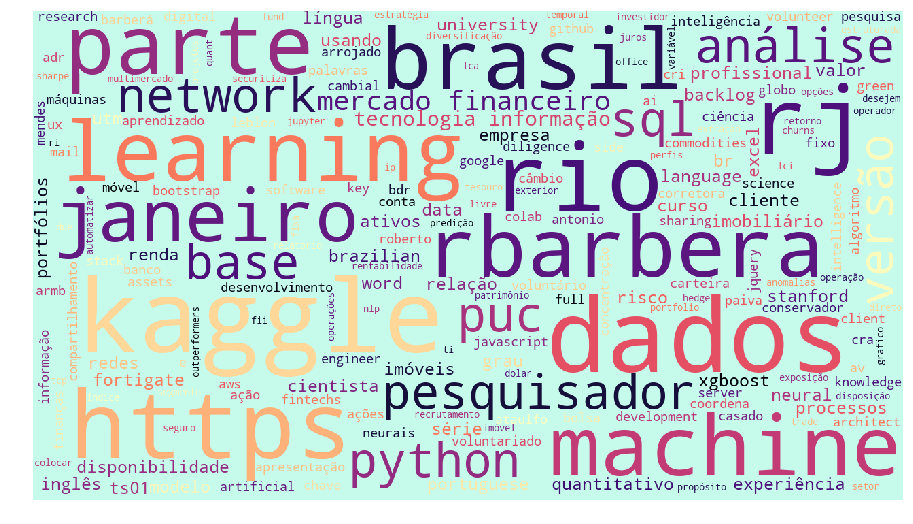

In [80]:
# Gerando uma wordcloud baseada na frequência das palavras chave
# Colormaps disponíveis 
'''
Possible values are: Accent, Accent_r, Blues, Blues_r, BrBG, BrBG_r, BuGn, BuGn_r, BuPu, BuPu_r, CMRmap, CMRmap_r, 
Dark2, Dark2_r, GnBu, GnBu_r, Greens, Greens_r, Greys, Greys_r, OrRd, OrRd_r, Oranges, Oranges_r, PRGn, PRGn_r, 
Paired, Paired_r, Pastel1, Pastel1_r, Pastel2, Pastel2_r, PiYG, PiYG_r, PuBu, PuBuGn, PuBuGn_r, PuBu_r, PuOr, 
PuOr_r, PuRd, PuRd_r, Purples, Purples_r, RdBu, RdBu_r, RdGy, RdGy_r, RdPu, RdPu_r, RdYlBu, RdYlBu_r, RdYlGn, 
RdYlGn_r, Reds, Reds_r, Set1, Set1_r, Set2, Set2_r, Set3, Set3_r, Spectral, Spectral_r, Wistia, Wistia_r, YlGn, 
YlGnBu, YlGnBu_r, YlGn_r, YlOrBr, YlOrBr_r, YlOrRd, YlOrRd_r, afmhot, afmhot_r, autumn, autumn_r, binary, 
binary_r, bone, bone_r, brg, brg_r, bwr, bwr_r, cividis, cividis_r, cool, cool_r, coolwarm, coolwarm_r, 
copper, copper_r, cubehelix, cubehelix_r, flag, flag_r, gist_earth, gist_earth_r, gist_gray, gist_gray_r, 
gist_heat, gist_heat_r, gist_ncar, gist_ncar_r, gist_rainbow, gist_rainbow_r, gist_stern, gist_stern_r, 
gist_yarg, gist_yarg_r, gnuplot, gnuplot2, gnuplot2_r, gnuplot_r, gray, gray_r, hot, hot_r, hsv, hsv_r, 
inferno, inferno_r, jet, jet_r, magma, magma_r, nipy_spectral, nipy_spectral_r, ocean, ocean_r, pink, 
pink_r, plasma, plasma_r, prism, prism_r, rainbow, rainbow_r, seismic, seismic_r, spring, spring_r, 
summer, summer_r, tab10, tab10_r, tab20, tab20_r, tab20b, tab20b_r, tab20c, tab20c_r, 
terrain, terrain_r, viridis, viridis_r, winter, winter_r
''';

from wordcloud import WordCloud

# Parâmetros personalizáveis da wordcloud

wordcloud = WordCloud(background_color = '#C6FBEB',
                      max_font_size = 150, 
                      width = 1280, 
                      height = 720, 
                      colormap= 'magma').generate(cvText) 

# Plotando a imagem final usando matplotlib
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(16, 9))
ax.imshow(wordcloud)
ax.set_axis_off()
plt.imshow(wordcloud)
wordcloud.to_file("wordcloud.png")
plt.show()

### [ 11 ] "Juntando tudo" numa única função de nome Cloud_Of_Words 

In [81]:
# Cloud_Of_Words realiza a limpeza dos CVs e retorna a wordcloud de um CV prontinha

In [82]:
from wordcloud import WordCloud

import matplotlib.pyplot as plt

def Cloud_Of_Words(cv, save = True):
    #  cv: informar o path completo com o nome do arquivo inclusive 
    
    pdfFile = pdfplumber.open(cv)
    first_Page = pdfFile.pages[0]  # Lê apenas a 1a. página. Se o seu curriculum tiver mais páginas, 
                                   # elas não serão consideradas. Na prática, por causa do grande volume,
                                   # os recrutadores não conseguem ler além da 1a. página.
        
    rawText = first_Page.extract_text()

    word_list = nltk.tokenize.word_tokenize(rawText)  # transforma o texto bruto numa token list
    word_list = [piece.lower() for piece in word_list] # padroniza tudo em lowercase

    keywords = [piece for piece in word_list if not piece in stop_words and not piece in garbage]  # elimina pontuações
    cvText = " ".join(s for s in keywords)  # concatena os tokens separando-os por espaços 


    wordcloud = WordCloud(background_color = '#C6FBEB',
                      max_font_size = 150, 
                      width = 1280, 
                      height = 720, 
                      colormap= 'magma').generate(cvText) 

    # exibe a imagem da wordcloud com matplotlib
    fig, ax = plt.subplots(figsize=(16, 9))
    ax.imshow(wordcloud)
    ax.set_axis_off()
    plt.imshow(wordcloud)

    if save:
        wordcloud.to_file(cv+"_wordcloud.png")

    plt.show()

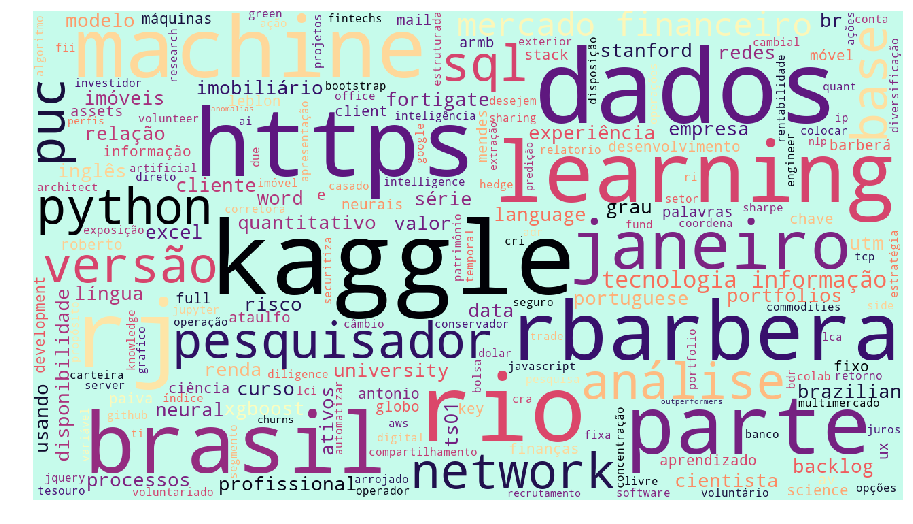

In [83]:
Cloud_Of_Words('ARMB1.pdf')

In [84]:
# Lendo os perfis de vagas anunciadas ('job_profiles.xlsx' - dê uma olhada no arquivo para poder entender)
import pandas as pd 
jobs = pd.read_excel('job_profiles.xls', sheet_name=None) # old format excel file, pois tomei um erro nos arquivos padrão .xlsx

In [85]:
jobs.keys() # retorna um python dict, onde as chaves são as guias (abas) da planilha excel. Cada guia é um tipo de vaga (job)

dict_keys(['pf-asset-analist', 'pf-client-support', 'pf-sell-side', 'pf-inv-relations'])

In [86]:
# Extraindo a quantidade de posições de trabalho e respectivas descrições (leia o arquivo para entender)
n_jobs = len(jobs.keys())
desc_jobs = list(jobs.keys())

In [87]:
# Transformando a saída numa lista de pandas dataframes (cada dataframe correspondendo a uma vaga)
jobs = [jobs[desc_jobs[i]] for i in range(n_jobs)]

In [88]:
jobs[0].head()

,keywords,weights
0,ação,3
1,ações,3
2,algoritmos,1
3,análise,3
4,apresentações,3


In [89]:
job1 = jobs[0]
job1.tail()

,keywords,weights
94,valor,2
95,viagens,1
96,word,2
97,yahoo finance,3
98,yfinance,3


In [90]:
key_words = list(job1['keywords'])
print(key_words) # python list

['ação', 'ações', 'algoritmos', 'análise', 'apresentações', 'bancário', 'banco', 'bdr', 'bolsa', 'cambial', 'câmbio', 'carteira', 'casado', 'COE', 'commodities', 'concentração', 'condução própria', 'conta', 'coordena', 'corretora', 'commodities', 'CRA', 'CRI', 'curso', 'debênture', 'digital', 'diligence', 'disponibilidade', 'diversificação', 'dolar', 'due ', 'empresa', 'estratégia', 'estruturada', 'excel', 'exposição', 'exterior', 'fdic', 'fii', 'fundo', 'google docs', 'google finance', 'grafico', 'gráfico', 'hedge', 'imobiliário', 'imóveis', 'imóvel', 'índice de sharpe', 'inglês', 'investidor', 'IP', 'jupyter', 'juros', 'LCA', 'LCI', 'machine learning', 'marcowitz', 'multimercado', 'office', 'opção', 'opções', 'operação', 'operações', 'operador', 'patrimônio', 'portfolio', 'power bi', 'python', 'python', 'quant', 'quantitativo', 'relação', 'relatorio', 'remoto', 'renda fixa', 'renda variável', 'rentabilidade', 'ri', 'risco', 'securitiza', 'PGBL', 'VGBL', 'série', 'setor', 'stocks', 't

In [91]:
# Limitando o valor máximo de frequências (evitando distorções)
import numpy as np

threshold = 7 # frequência máxima limite, admitida por key word
  
weights = list(job1['weights']) # pesos
key_words = list(job1['keywords'])
max_weight = np.sum(np.array(weights) * threshold)
print(max_weight)

1337


In [92]:
# contando as palavras chaves que ocorrem no CV

count_K = [cvText.count(piece) for piece in key_words]
print(count_K)

[19, 2, 0, 3, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 2, 0, 1, 1, 2, 1, 1, 1, 2, 1, 1, 2, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 2, 2, 1, 0, 2, 1, 0, 1, 1, 0, 0, 3, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 2, 2, 1, 0, 1, 1, 1, 35, 2, 1, 0, 0, 2, 1, 0, 0, 1, 1, 1, 0, 1, 25, 1, 2, 0, 2, 0, 0]


In [93]:
# Função utilitária que limita a freUência máxima de um determinado parâmetro (limita ao valor de threshold)
def lim(x):
    return x if x <= threshold else threshold

count_K = [lim(i) for i in count_K]
print(count_K) # veja que count_K[0] foi ajustada de 19 para 7 (que é o threshold - limite máximo)

[7, 2, 0, 3, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 2, 0, 1, 1, 2, 1, 1, 1, 2, 1, 1, 2, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 2, 2, 1, 0, 2, 1, 0, 1, 1, 0, 0, 3, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 2, 2, 1, 0, 1, 1, 1, 7, 2, 1, 0, 0, 2, 1, 0, 0, 1, 1, 1, 0, 1, 7, 1, 2, 0, 2, 0, 0]


In [94]:
# O score é a média ponderada das frequências das palavras-chave 
score = ((np.array(count_K) * weights).sum()/max_weight).round(4)
print("Score Centesimal ", score)
print("Score Percentual: ", str(round(score, 4)*100)+"%")

Score Centesimal  0.1578
Score Percentual:  15.78%


### [ 12 ] O "grau" de "matching" obtido entre curricula e as vagas (perfis) ofertadas

In [95]:
stop_words = nltk.corpus.stopwords.words("portuguese")
print(stop_words)

['de', 'a', 'o', 'que', 'e', 'é', 'do', 'da', 'em', 'um', 'para', 'com', 'não', 'uma', 'os', 'no', 'se', 'na', 'por', 'mais', 'as', 'dos', 'como', 'mas', 'ao', 'ele', 'das', 'à', 'seu', 'sua', 'ou', 'quando', 'muito', 'nos', 'já', 'eu', 'também', 'só', 'pelo', 'pela', 'até', 'isso', 'ela', 'entre', 'depois', 'sem', 'mesmo', 'aos', 'seus', 'quem', 'nas', 'me', 'esse', 'eles', 'você', 'essa', 'num', 'nem', 'suas', 'meu', 'às', 'minha', 'numa', 'pelos', 'elas', 'qual', 'nós', 'lhe', 'deles', 'essas', 'esses', 'pelas', 'este', 'dele', 'tu', 'te', 'vocês', 'vos', 'lhes', 'meus', 'minhas', 'teu', 'tua', 'teus', 'tuas', 'nosso', 'nossa', 'nossos', 'nossas', 'dela', 'delas', 'esta', 'estes', 'estas', 'aquele', 'aquela', 'aqueles', 'aquelas', 'isto', 'aquilo', 'estou', 'está', 'estamos', 'estão', 'estive', 'esteve', 'estivemos', 'estiveram', 'estava', 'estávamos', 'estavam', 'estivera', 'estivéramos', 'esteja', 'estejamos', 'estejam', 'estivesse', 'estivéssemos', 'estivessem', 'estiver', 'estiv

In [96]:

def Match_Score(cv, job, threshold=7):
    #  cv: informar o path completo com o nome do arquivo inclusive 
    
    pdfFile = pdfplumber.open(cv)
    first_Page = pdfFile.pages[0]  # Lê apenas a 1a. página. Se o seu curriculum tiver mais páginas, 
                                   # elas não serão consideradas. Na prática, por causa do grande volume,
                                   # os recrutadores não conseguem ler além da 1a. página.
            
    rawText = first_Page.extract_text()

    word_list = nltk.tokenize.word_tokenize(rawText)  # transforma texto bruto numa token list
    word_list = [piece.lower() for piece in word_list]  # pssas todas as letras das palavras para lower case

    keywords = [piece for piece in word_list if not piece in stop_words and not piece in garbage]  # elimina pontuações
    cvText = " ".join(s for s in keywords)  # concatena todas as palavras separando-as por um espaço 

    weights = list(job['weights'])
    key_words = list(job['keywords'])

    count_K = [cvText.count(piece) for piece in key_words]  # conta quantas vezes um termo aparece en cvText

    def lim (x, threshold):
        return x if x <= threshold else threshold

    count_K = [lim(i, threshold) for i in count_K]   # limita de frequencia dos termos ao threshold

    w_Max = np.sum(np.array(weights) * threshold) 

    score = ((np.array(count_K) * weights).sum()/w_Max).round(4)

    return score

In [97]:
# Testando a função com o curriculum de ARMB2.pdf)
print(Match_Score('ARMB2.pdf', jobs[0], 5), Match_Score('ARMB2.pdf', jobs[1], 5), Match_Score('ARMB2.pdf', jobs[2], 5), Match_Score('ARMB2.pdf', jobs[3], 5))

0.0974 0.096 0.0857 0.1042


In [98]:
# Testando a função com o curriculum de ARMB1.pdf)
print(Match_Score('ARMB1.pdf', jobs[0], 5), Match_Score('ARMB1.pdf', jobs[1], 5), Match_Score('ARMB1.pdf', jobs[2], 5), Match_Score('ARMB1.pdf', jobs[3], 5))

0.2084 0.2194 0.201 0.2168


### [ 13 ] - Processando um lote de CVs e ordenando os CVs segundo os perfis (das vagas)

In [99]:
# Processando o batch de CVs
jobs_list = jobs
cv_list = ['ARMB1.pdf', 'ARMB2.pdf', 'ARMB3.pdf']

In [100]:
print(jobs_list)

[         keywords  weights
0            ação        3
1           ações        3
2      algoritmos        1
3         análise        3
4   apresentações        3
..            ...      ...
94          valor        2
95        viagens        1
96           word        2
97  yahoo finance        3
98       yfinance        3

[99 rows x 2 columns],          keywords  weights
0            ação        3
1           ações        3
2      algoritmos        2
3         análise        1
4   apresentações        2
..            ...      ...
94          valor        3
95        viagens        1
96           word        1
97  yahoo finance        1
98       yfinance        1

[99 rows x 2 columns],          keywords  weights
0            ação        2
1           ações        2
2      algoritmos        1
3         análise        1
4   apresentações        3
..            ...      ...
94          valor        2
95        viagens        2
96           word        2
97  yahoo finance        1
98    

In [101]:
# Criando uma lista de listas com os scores obtidos por candidato, usando Match_Score()
applicators = [[Match_Score(cv, jobs[2]) for jobs[2] in jobs_list] for cv in cv_list]
applicators

[[0.1578, 0.1665, 0.1665, 0.1639],
 [0.0785, 0.0784, 0.0784, 0.0835],
 [0.1399, 0.1469, 0.1469, 0.1684]]

In [102]:
# Filtrando apenas os nomes relacionados a jobs[2] que é o perfil "pf-sell-side" 
names = [cv.split('/')[-1].split('.')[0] for cv in cv_list]

In [103]:
names

['ARMB1', 'ARMB2', 'ARMB3']

In [104]:
# Matches de jobs[2]
matchs = pd.DataFrame(applicators, columns = desc_jobs, index = names)

In [105]:
# Listando e ordenando os scores para, por exemplo, o perfil jobs[0] que é "pf-asset-analist"
matchs.sort_values(by="pf-asset-analist", ascending = False)

,pf-asset-analist,pf-client-support,pf-sell-side,pf-inv-relations
ARMB1,0.1578,0.1665,0.1665,0.1639
ARMB3,0.1399,0.1469,0.1469,0.1684
ARMB2,0.0785,0.0784,0.0784,0.0835


In [106]:
# O mesmo para jobs[1], "pf-asset-analist"
matchs.sort_values(by='pf-client-support', ascending = False)

,pf-asset-analist,pf-client-support,pf-sell-side,pf-inv-relations
ARMB1,0.1578,0.1665,0.1665,0.1639
ARMB3,0.1399,0.1469,0.1469,0.1684
ARMB2,0.0785,0.0784,0.0784,0.0835


In [107]:
# O mesmo para jobs[3] "pf-asset-analist"  profile
matchs.sort_values(by='pf-inv-relations', ascending = False)

,pf-asset-analist,pf-client-support,pf-sell-side,pf-inv-relations
ARMB3,0.1399,0.1469,0.1469,0.1684
ARMB1,0.1578,0.1665,0.1665,0.1639
ARMB2,0.0785,0.0784,0.0784,0.0835


# Conclusão

- NLTK e pdfplumb são dois poderosos recursos muito úteis quando se trata de lidar com centenas, talvez milhares de currículos, durante o processo de recrutamento e seleção, oferecendo a possibilidade de automatização completa do processo de separação de currículos, usando em "canadas" de filtragem organizadas. Este processo poupa tempo precioso da equipe de seleção e ajuda, em especial, na eliminação de curriculos que estejam fora dos perfis pretendidos. Neste estudo, por exemplo, ARMB3 seria o mais adequado para a posição de "Analista de Relações com Investidores", que é o posto de trabalho que corresponde ao perfil "pf-inv-relations".

#### By Antonio Roberto Mendes Barbera, Rio de Janeiro - Brasil (04/07/2021)
e-mail: roberto.barbera@gmail.com
+55 21 992992949